<h1 align='center'>Hotel Booking Analysis</h1>

<h5>Problem Description</h5>

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

The purpose of this project to analyse the most occupied times in the year for booking hotels

In [ ]:
# Import the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df_data_1 = pd.read_csv('hotel_bookings.csv')
df_data_1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df=df_data_1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 32)

We have 32 Columns and 119390 in the datasets. from the head command we can see that some data types are affected rightly.
Besides, we see there are some missing values in the dataset. We need to clean it :

In [5]:
df['children'].fillna(0,inplace=True)
df['children']=df['children'].astype('int64',copy=False)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df[['agent','company']].fillna(0,inplace=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df['stays_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


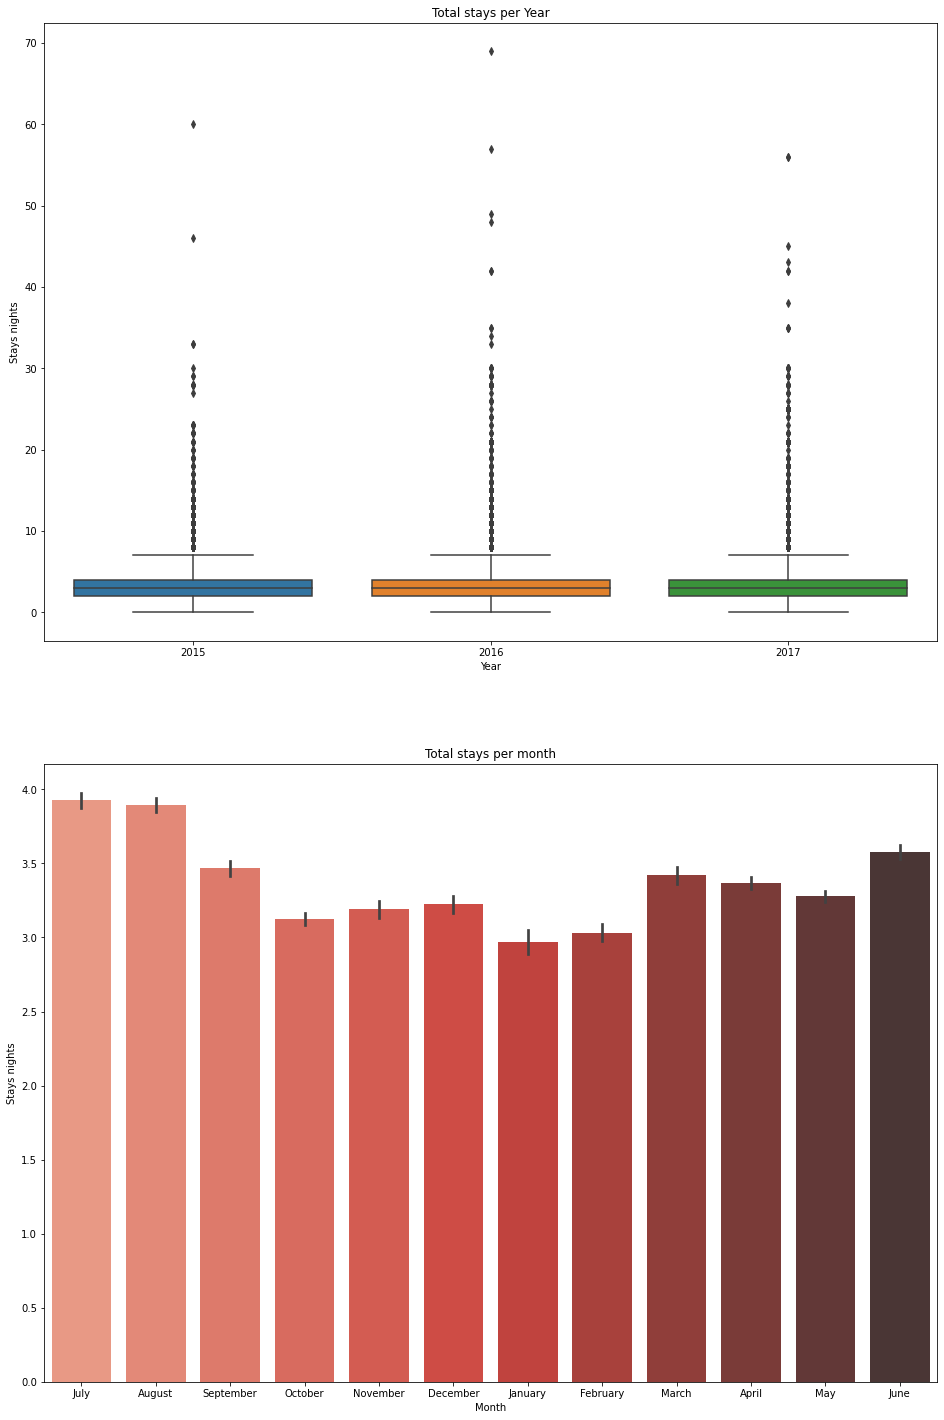

In [9]:
plt.figure(figsize=(16,25))
plt.subplot(2,1,1)
sns.boxplot(x="arrival_date_year", y="stays_nights", data=df)
plt.xlabel('Year')
plt.ylabel('Stays nights')
plt.title('Total stays per Year')

plt.subplot(2,1,2)
sns.barplot(x="arrival_date_month", y="stays_nights", data=df,palette='Reds_d')
plt.xlabel('Month')
plt.ylabel('Stays nights')
plt.title('Total stays per month')

plt.show()

In [20]:
category=[]
for a,c,b in zip(df['adults'],df['children'],df['babies']):
    if a!=0 and b!=0 and c!=0:
        category.append('Adult Babies Children')
    elif a!=0 and b!=0 and c==0 :
        category.append('Adult Babies')
    elif a!=0 and b==0 and c!=0 :
        category.append('Adult Children')
    elif a!=0 and b==0 and c==0 :
        category.append('Adult')
    else :
        category.append('None')
len(category)

119390

In [21]:
df['category']=category
import plotly.express as px

fig = px.funnel(x=df.category.value_counts().values, y=df.category.value_counts().index)
fig.show()

In [22]:
stayscategory=[]
for e,w in zip(df['stays_in_weekend_nights'],df['stays_in_week_nights']):
    if e!=0 and w!=0:
        stayscategory.append('Whole week')
    elif e!=0 and w==0 :
        stayscategory.append('Week')
    elif e==0 and w!=0 :
        stayscategory.append('Weekend')
    else :
        stayscategory.append('None')
len(stayscategory)

119390

In [23]:
df['stays_category']=stayscategory
fig = px.funnel(x=df.stays_category.value_counts().values, y=df.stays_category.value_counts().index)
fig.show()

In [24]:
dummies=pd.get_dummies(df['hotel'])
df=pd.concat([df,dummies],axis=1)
df.drop('hotel',axis=1,inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights,category,stays_category,City Hotel,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0,...,0.0,0,0,Check-Out,2015-07-01,0,Adult,None,0,1
1,0,737,2015,July,27,1,0,0,2,0,...,0.0,0,0,Check-Out,2015-07-01,0,Adult,None,0,1
2,0,7,2015,July,27,1,0,1,1,0,...,75.0,0,0,Check-Out,2015-07-02,1,Adult,Weekend,0,1
3,0,13,2015,July,27,1,0,1,1,0,...,75.0,0,0,Check-Out,2015-07-02,1,Adult,Weekend,0,1
4,0,14,2015,July,27,1,0,2,2,0,...,98.0,0,1,Check-Out,2015-07-03,2,Adult,Weekend,0,1


<AxesSubplot:>

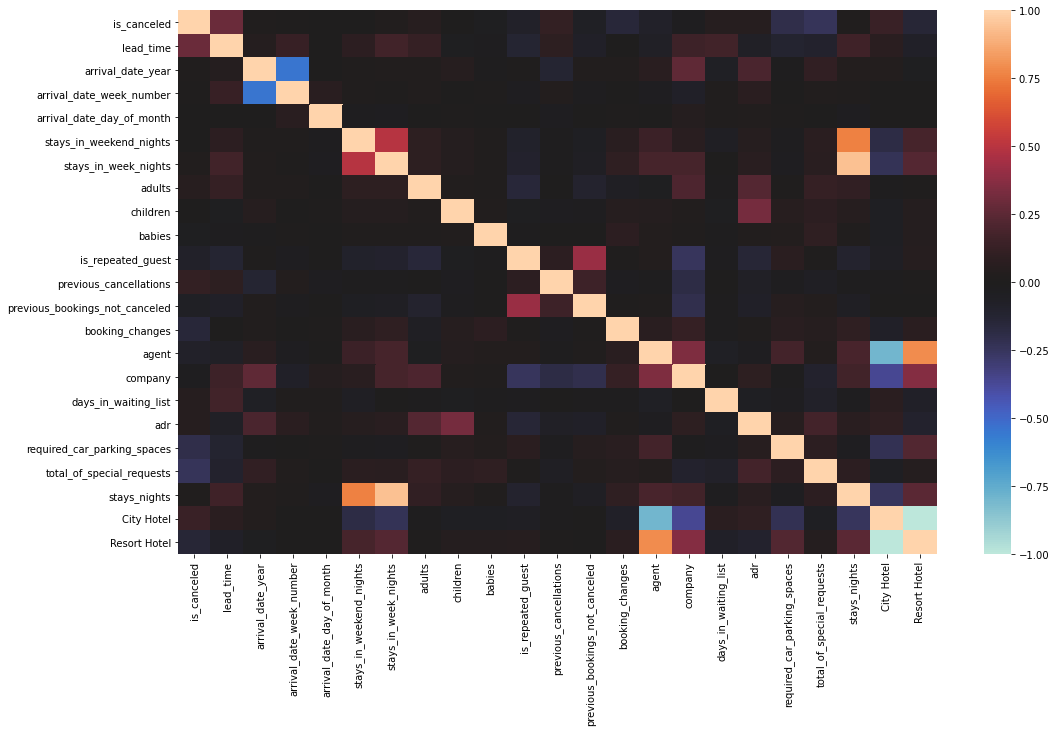

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=False)

In [26]:
y1=df[df['arrival_date_year']==2015]
y1=y1.sort_values(by='arrival_date_week_number',kind='mergesort')
y1.reset_index(drop=True)

y2=df[df['arrival_date_year']==2016]
y2=y2.sort_values(by='arrival_date_week_number',kind='mergesort')
y2.reset_index(drop=True)

y3=df[df['arrival_date_year']==2017]
y3=y3.sort_values(by='arrival_date_week_number',kind='mergesort')
y3.reset_index(drop=True)
y3.tail()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights,category,stays_category,City Hotel,Resort Hotel
119385,0,23,2017,August,35,30,2,5,2,0,...,96.14,0,0,Check-Out,2017-09-06,7,Adult,Whole week,1,0
119386,0,102,2017,August,35,31,2,5,3,0,...,225.43,0,2,Check-Out,2017-09-07,7,Adult,Whole week,1,0
119387,0,34,2017,August,35,31,2,5,2,0,...,157.71,0,4,Check-Out,2017-09-07,7,Adult,Whole week,1,0
119388,0,109,2017,August,35,31,2,5,2,0,...,104.40,0,0,Check-Out,2017-09-07,7,Adult,Whole week,1,0
119389,0,205,2017,August,35,29,2,7,2,0,...,151.20,0,2,Check-Out,2017-09-07,9,Adult,Whole week,1,0


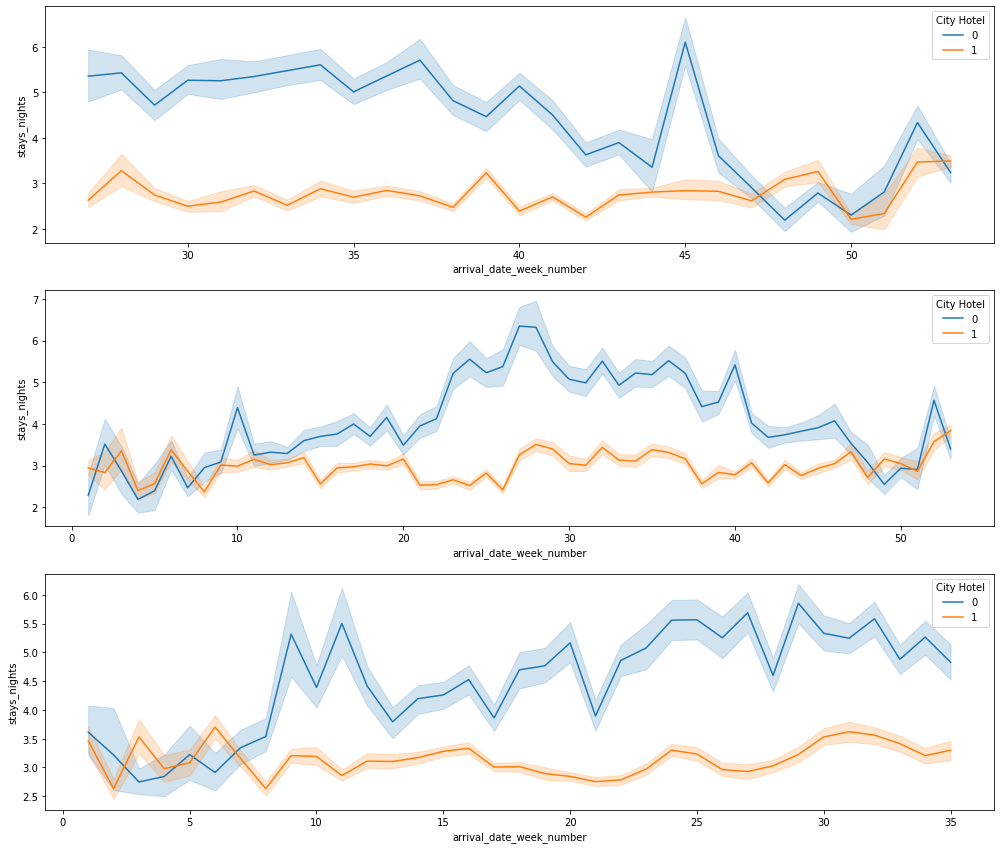

In [27]:
plt.figure(figsize=(17,20))
plt.subplot(4,1,1)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y1)

plt.subplot(4,1,2)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y2)

plt.subplot(4,1,3)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y3)

plt.show()

<AxesSubplot:>

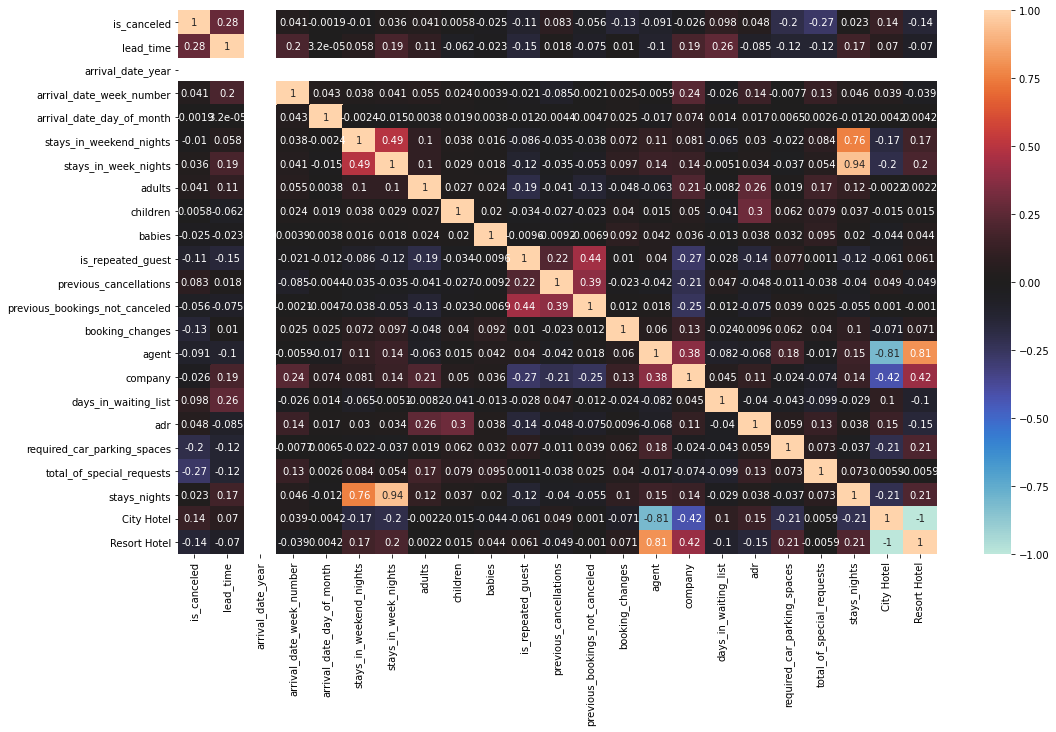

In [28]:
plt.figure(figsize=(17,10))
sns.heatmap(y2.corr(),vmin=-1,vmax=1,center=0,annot=True)

<AxesSubplot:>

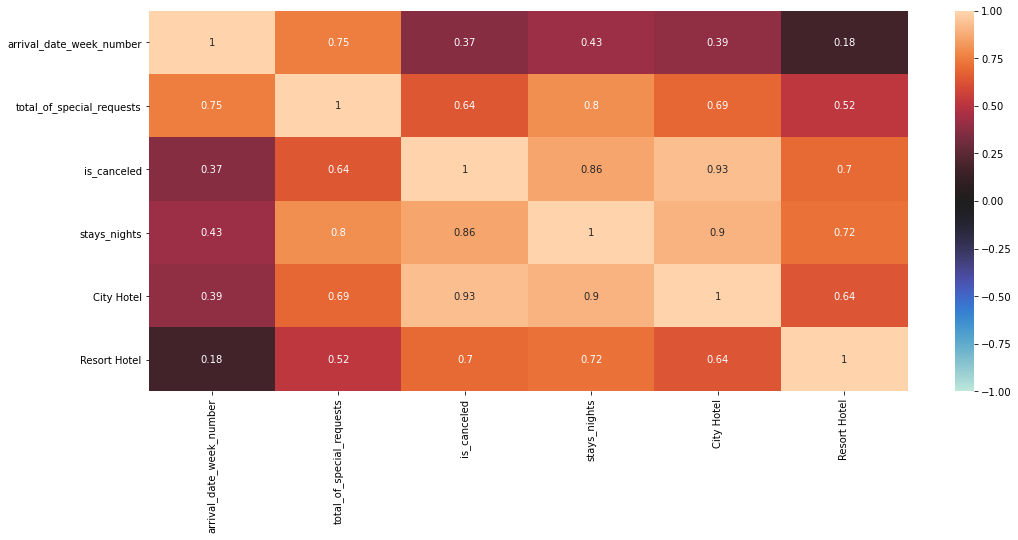

In [29]:
# We will use 2016 since we got the data for every week of the year
df2=y2.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
df1=y1.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
df3=y3.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
plt.figure(figsize=(17,7))
sns.heatmap(df2.corr(),vmin=-1,vmax=1,center=0,annot=True)

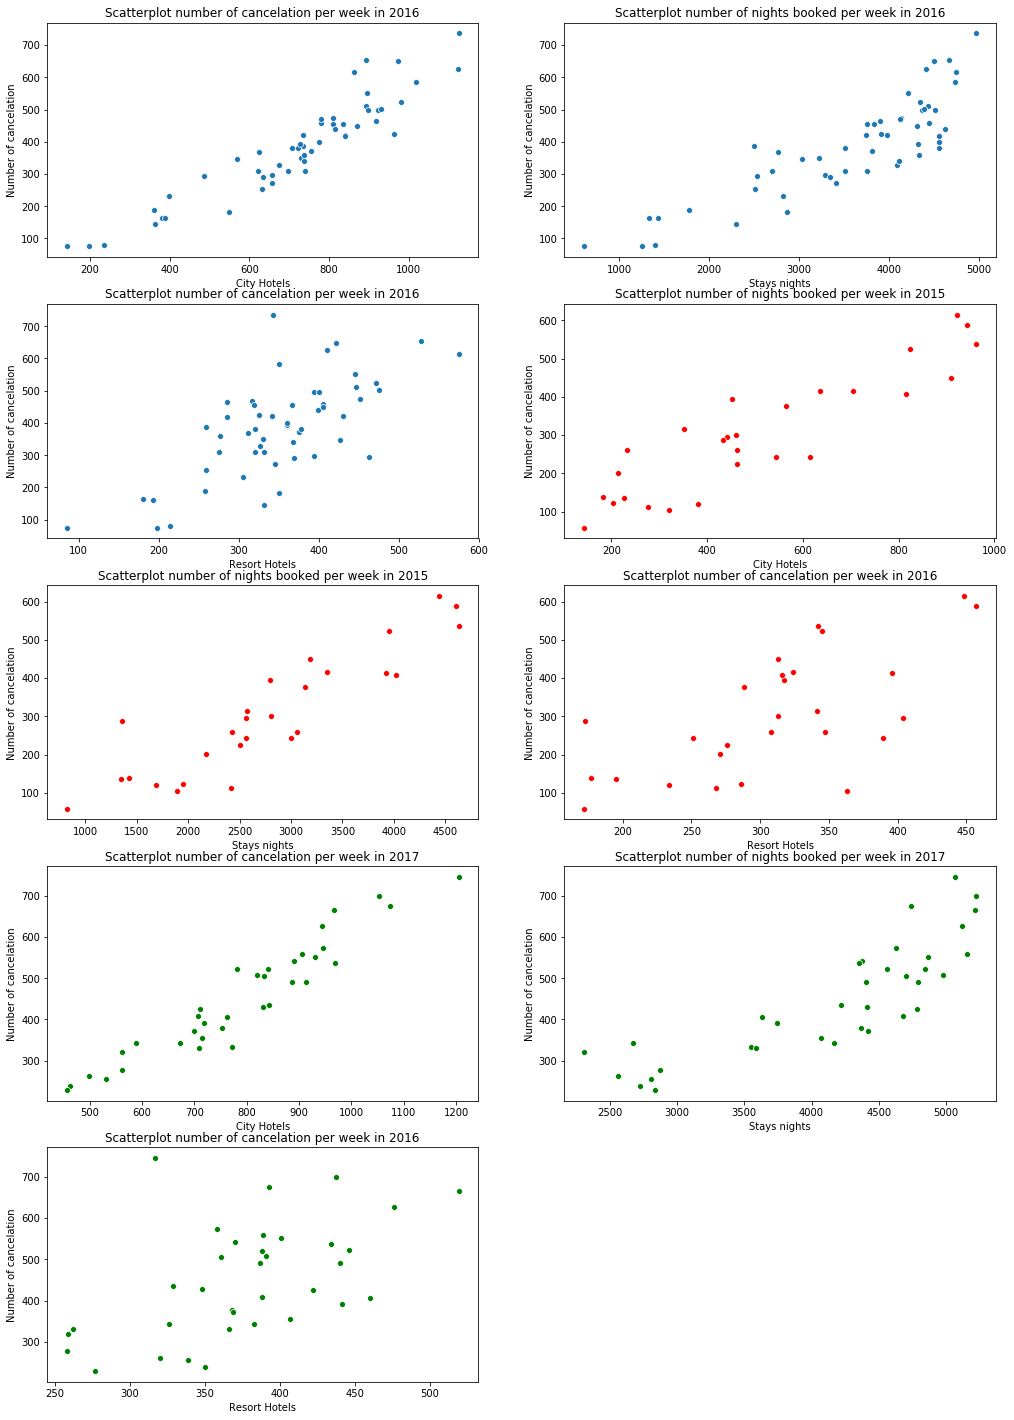

In [33]:
# Add the year to the week number
plt.figure(figsize=(17,25))
plt.subplot(5,2,1)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df2)
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,2)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df2)
plt.title("Scatterplot number of nights booked per week in 2016")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,3)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df2)
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,4)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,5)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,6)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,7)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of cancelation per week in 2017")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,8)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of nights booked per week in 2017")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,9)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.show()

First we're gonna predict the best time to book a hotel room

The first model

target : is_canceld

features : stays_nights

In [34]:
df1x=df1[['stays_nights','City Hotel','Resort Hotel']]
df2x=df2[['stays_nights','City Hotel','Resort Hotel']]
df3x=df3[['stays_nights','City Hotel','Resort Hotel']]
df1y=df1[['is_canceled']]
df2y=df2[['is_canceled']]
df3y=df3[['is_canceled']]
df1x.head()

,stays_nights,City Hotel,Resort Hotel
0,1425,182.0,177.0
1,2171,214.0,271.0
2,2573,352.0,341.0
3,2798,453.0,317.0
4,2422,232.0,347.0


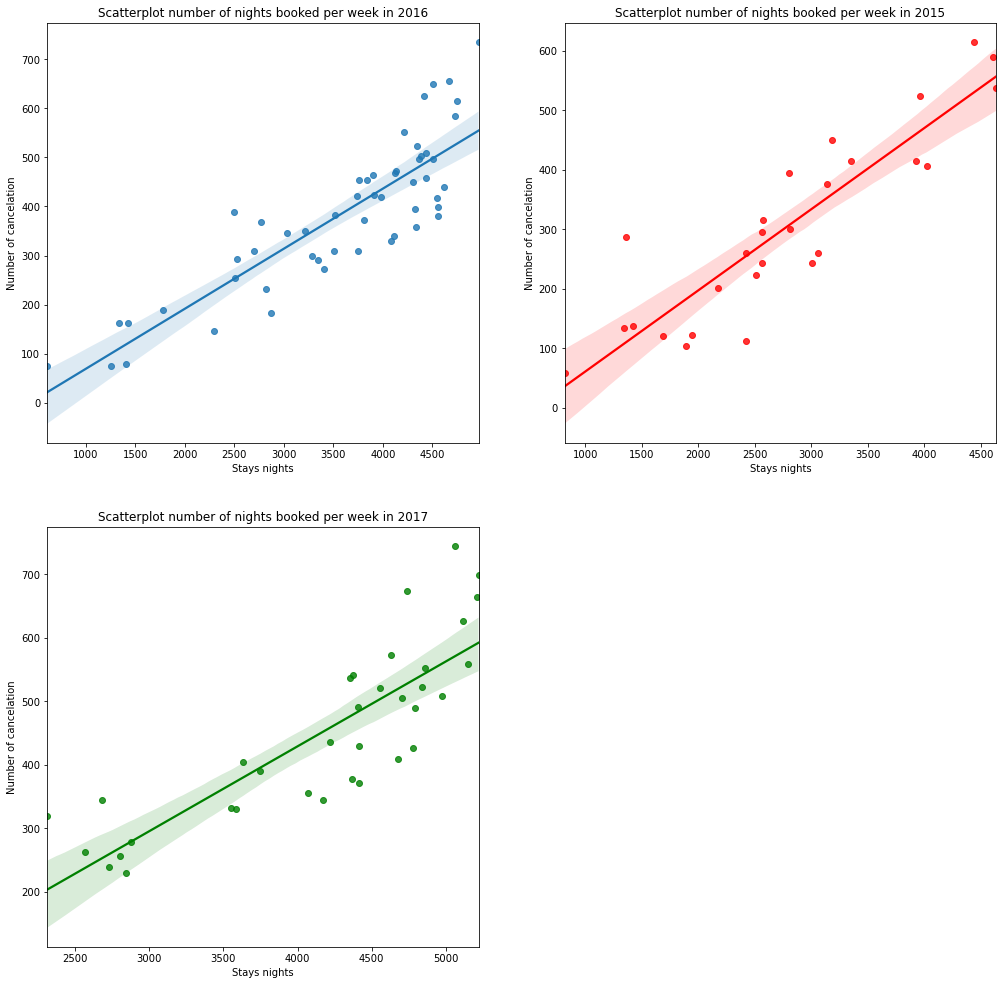

In [37]:
# Add the year to the week number
plt.figure(figsize=(17,17))
plt.subplot(2,2,1)
sns.regplot(x="stays_nights",y="is_canceled",data=df2)
plt.title("Scatterplot number of nights booked per week in 2016")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(2,2,2)
sns.regplot(x="stays_nights",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(2,2,3)
sns.regplot(x="stays_nights",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of nights booked per week in 2017")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.show()

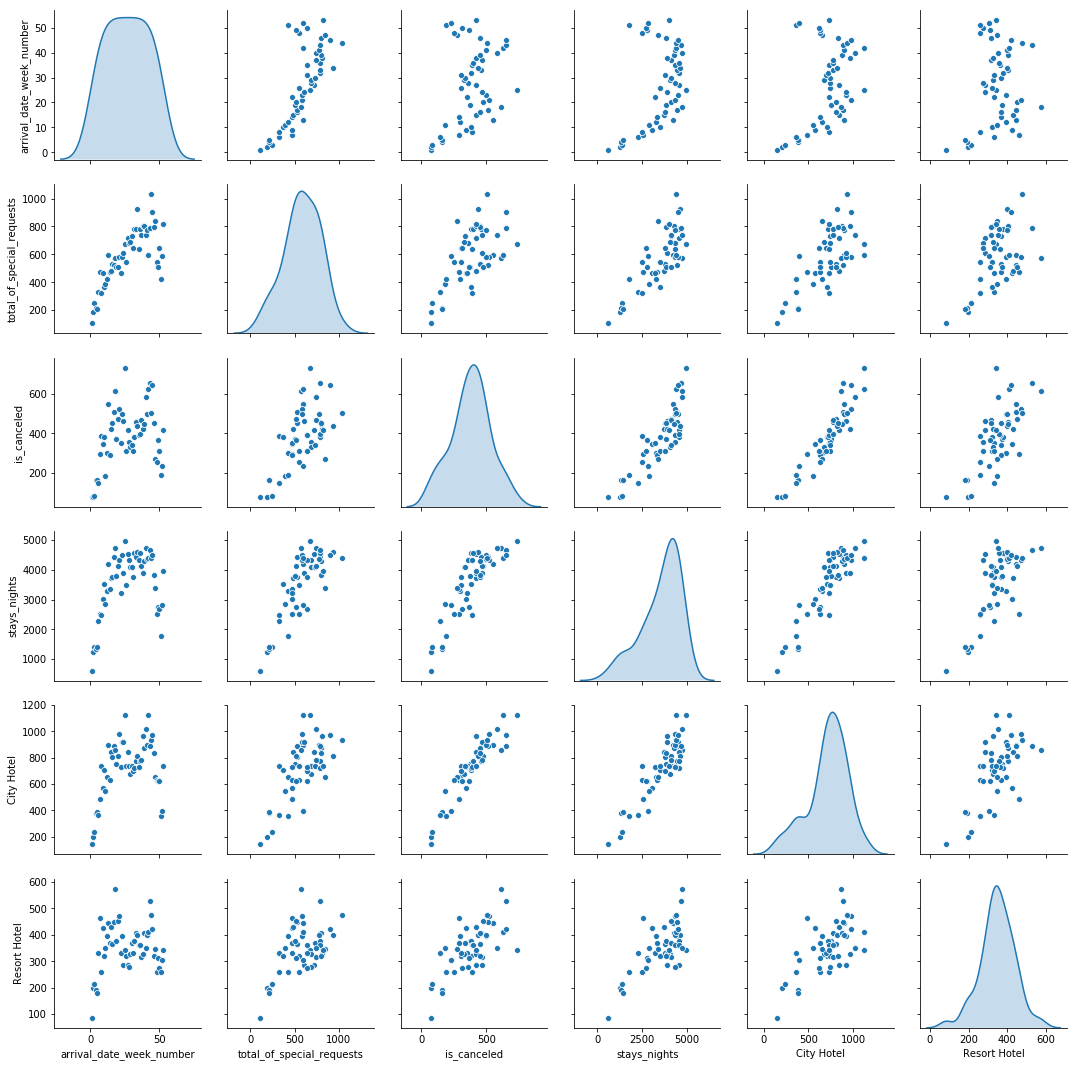

In [48]:
g = sns.pairplot(df2,diag_kind="kde")

Since we got the data for the year of 2016. Let's select the weeks with lowest number of cancelation or the lowest night stays